    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.089926  0.343874  0.176382  0.169358 -0.413337 -0.276315  0.188070   
1  0.303261  0.084930  0.047369 -0.017244 -0.524733 -0.104934  0.335107   
2 -0.274291  0.216801  0.029110  0.259279 -0.655594 -0.289643  0.073369   
3  0.118676  0.095572  0.157358  0.225097 -0.632885 -0.125629  0.204013   
4  0.298772  0.300674  0.366119 -0.022142 -0.748852 -0.035268  0.277504   

    embed_7   embed_8   embed_9  ...  embed_375  embed_376  embed_377  \
0  0.094621  0.330203 -0.258730  ...  -0.272278  -0.230662   0.173143   
1 -0.081476  0.213762 -0.105293  ...  -0.310262  -0.090271   0.129022   
2  0.014463  0.104336 -0.014190  ...  -0.464926  -0.117493  -0.118993   
3  0.074028  0.149310 -0.147779  ...  -0.030543  -0.100965   0.236099   
4  0.075697  0.055439 -0.200804  ...  -0.149575  -0.230057   0.296528   

   embed_378  embed_379  embed_380  embed_381  embed_382  embed_383  output  
0  -0.259786  -0.316996  -0.3899

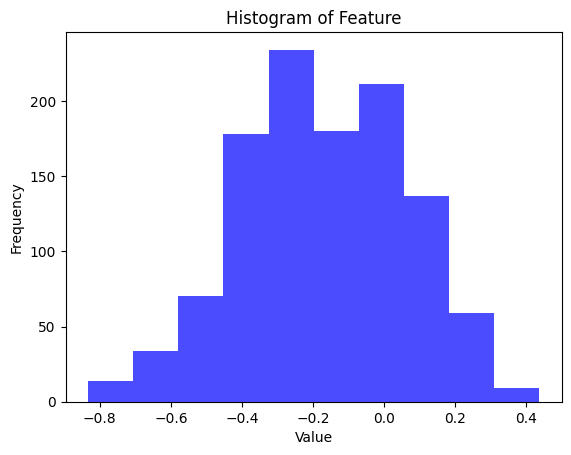

Mean of the feature: -0.17029445322602035
Variance of the feature: 0.05343827792925807


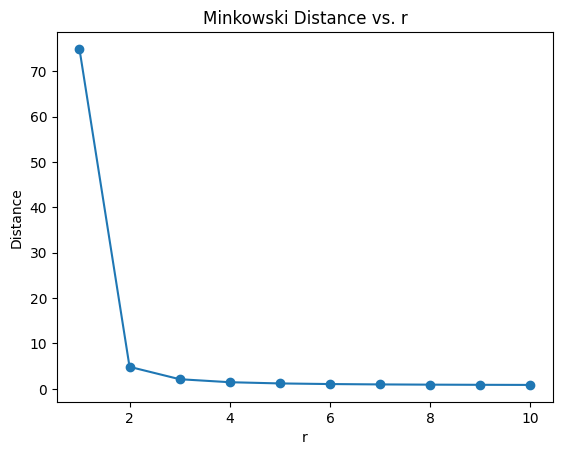

Training data shape: (788, 384)
Testing data shape: (338, 384)
Knn neighbour: KNeighborsClassifier(n_neighbors=3)
Test Accuracy: 0.742603550295858
Predictions: [0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 0]
Actual labels: [1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 

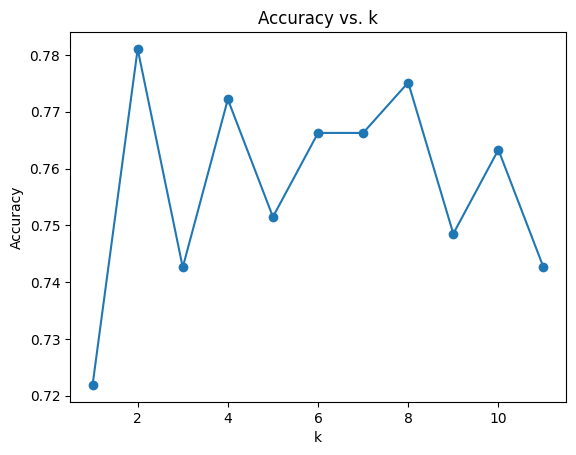

Confusion Matrix:
 [[204  45]
 [ 42  47]]
Precision: 0.5108695652173914
Recall: 0.5280898876404494
F1 Score: 0.5193370165745856


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


# Load data from Excel file
file_path = 'training_mathbert 3 test.xlsx' 
df = pd.read_excel(file_path)

# Display the first few rows to verify data
print(df.head())

# Assuming the last column is the label and others are features
data = df.iloc[:, :-1].values  # Extract all columns except the last one as features
labels = df.iloc[:, -1].values  # Extract the last column as labels

print("Data Shape:", data.shape)
print("Labels Shape:", labels.shape)

# Separate the data into two classes
class1_data = data[labels == 0]  # Assuming 0 is the label for the first class
class2_data = data[labels == 1]  # Assuming 1 is the label for the second class

# Calculate the mean (centroid) for each class
centroid1 = np.mean(class1_data, axis=0)
centroid2 = np.mean(class2_data, axis=0)

# Calculate the spread (standard deviation) for each class
spread1 = np.std(class1_data, axis=0)
spread2 = np.std(class2_data, axis=0)

# Calculate the distance between the two centroids
interclass_distance = np.linalg.norm(centroid1 - centroid2)

print("Class 1 Centroid:", centroid1)
print("Class 2 Centroid:", centroid2)
print("Class 1 Spread:", spread1)
print("Class 2 Spread:", spread2)
print("Interclass Distance:", interclass_distance)



# Choose a feature, for example, the first feature in the dataset
feature_index = 0  # Change this index to select a different feature
feature_data = data[:, feature_index]

# Plot the histogram
plt.hist(feature_data, bins=10, alpha=0.7, color='blue')
plt.title('Histogram of Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and variance of the feature
mean_feature = np.mean(feature_data)
variance_feature = np.var(feature_data)

print("Mean of the feature:", mean_feature)
print("Variance of the feature:", variance_feature)



# Choose two feature vectors (rows in your data)
vec1 = data[0]  # First vector
vec2 = data[1]  # Second vector

# Calculate Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = [np.sum(np.abs(vec1 - vec2)**r)**(1/r) for r in r_values]

# Plot the distance vs. r
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Distance')
plt.show()



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Train the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
print("Knn neighbour:",knn.fit(X_train, y_train))

# Evaluate the accuracy of the model on the test set
accuracy = knn.score(X_test, y_test)
print("Test Accuracy:", accuracy)


# Predict the labels for the test set
predictions = knn.predict(X_test)

print("Predictions:", predictions)
print("Actual labels:", y_test)


# Test different values of k from 1 to 11 and record the accuracy
accuracies = []
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# Plot accuracy vs. k
plt.plot(range(1, 12), accuracies, marker='o')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


# Generate confusion matrix and calculate precision, recall, and F1 score
conf_matrix = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
